# Initial Corpus Analysis
*We seek to describe the corpus by identifying its size, most common words and phrases, and basic patterns.* 

In [107]:
# Import libraries
import os
import json
from nltk.tokenize import TweetTokenizer
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [111]:
# import nltk
# nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Paul\AppData\Roaming\nltk_data...


True

### Collecting Samples

In [36]:
%run functions.ipynb

In [3]:
# View directories
os.listdir('../data')

['post_covid', 'pre_covid', 'README.md']

In [4]:
# Read in Tweet data and create two lists of dictionairies
pre_covid_tweets = []
post_covid_tweets = []
summary = []

# Handle pre-covid data
for filename in os.listdir('../data/pre_covid'):
    try:
        json_string = open(f'../data/pre_covid/{filename}').read()
        tweets = json.loads(json_string)
        summary.append(('pre', len(tweets), filename.split('_')[0]))
        pre_covid_tweets.extend(tweets)
    except:
        print(f'Error reading {filename}')
        continue   
        
# Handle post-covid data
for filename in os.listdir('../data/post_covid'):
    try:
        json_string = open(f'../data/post_covid/{filename}').read()
        tweets = json.loads(json_string)
        summary.append(('post', len(tweets), filename.split('_')[0]))
        post_covid_tweets.extend(tweets)
    except:
        print(f'Error reading {filename}')
        continue 
        
print(f'There are {len(pre_covid_tweets)} tweets dated before the COVID-19 pandemic, and {len(post_covid_tweets)}\
 tweets dated during the pandemic. ')

There are 8334 tweets dated before the COVID-19 pandemic, and 6844 tweets dated during the pandemic. 


In [5]:
for file in summary:
    print(f'There are {file[1]} {file[0]}-covid tweets under the hashtag {file[2]}.')

There are 1000 pre-covid tweets under the hashtag #antivaccine.
There are 1000 pre-covid tweets under the hashtag #antivax.
There are 76 pre-covid tweets under the hashtag #bigpharmakills.
There are 0 pre-covid tweets under the hashtag #bigpharmasins.
There are 1000 pre-covid tweets under the hashtag #cdcwhistleblower.
There are 0 pre-covid tweets under the hashtag #educateb4uvax.
There are 1000 pre-covid tweets under the hashtag #markofthebeast.
There are 1000 pre-covid tweets under the hashtag #sb277.
There are 76 pre-covid tweets under the hashtag #stopmandatoryvaccination.
There are 10 pre-covid tweets under the hashtag #tannersdad.
There are 0 pre-covid tweets under the hashtag #va$$ines.
There are 3 pre-covid tweets under the hashtag #vaccinecult.
There are 88 pre-covid tweets under the hashtag #vaccinedamage.
There are 80 pre-covid tweets under the hashtag #vaccinefailure.
There are 542 pre-covid tweets under the hashtag #vaccineinjured.
There are 136 pre-covid tweets under the 

In [7]:
# Subset pre-covid tweets to get equal sample sizes
pre_covid_tweets = sample(pre_covid_tweets, len(post_covid_tweets))

### Normalization

In [12]:
tt = TweetTokenizer()

In [13]:
# Tokenize the Tweets to generate frequency lists
pre_toks = []
post_toks = []

# Handle pre-covid tweets
for tweet in pre_covid_tweets:
    t = tweet['text']
    pre_toks.extend(tt.tokenize(t))
    
# Handle post-covid tweets
for tweet in post_covid_tweets:
    t = tweet['text']
    post_toks.extend(tt.tokenize(t))

pre_dist = Counter(pre_toks)
post_dist = Counter(post_toks)

### N-gram Frequency Lists

#### 1-grams

In [28]:
# Most frequent pre-covid tokens
pre_dist.most_common(20)

[('.', 2711),
 ('to', 1887),
 ('the', 1664),
 (':', 1532),
 (',', 1253),
 ('#CDCwhistleblower', 1173),
 ('of', 982),
 ('#vaccines', 905),
 ('in', 886),
 ('!', 804),
 ('a', 778),
 ('and', 777),
 ('#antivax', 717),
 ('?', 714),
 ('is', 697),
 ('#SB277', 687),
 ('for', 612),
 ('#markofthebeast', 606),
 ('&', 565),
 ('#antivaccine', 562)]

In [27]:
# Most frequent post-covid tokens
post_dist.most_common(20)

[('.', 5541),
 ('the', 4184),
 ('to', 3576),
 (',', 3352),
 ('a', 2363),
 (':', 2285),
 ('of', 2111),
 ('and', 2111),
 ('!', 1954),
 ('?', 1661),
 ('for', 1634),
 ('in', 1531),
 ('is', 1450),
 ('this', 1406),
 ('#vaccines', 1201),
 ('&', 1100),
 ('#VaccinesWork', 1095),
 ('that', 1087),
 ('’', 1074),
 ('are', 979)]

#### Bigrams

In [26]:
# Most frequent pre-covid bigrams
pre_covid_bigrams = get_ngram_tokens(pre_toks, 2)
pre_covid_bigram_dist = Counter(pre_covid_bigrams)
pre_covid_bigram_dist.most_common(20)

[('#markofthebeast #financialscandal', 520),
 ('#lies #markofthebeast', 518),
 ('#EVIL #lies', 517),
 ('#financialscandal #sexualmisconduct', 514),
 ('#afliknuage #electronics62761', 511),
 ('#electronics62761 #corporategreed', 483),
 ('#corporategreed #EVIL', 481),
 ('#classaction #afliknuage', 364),
 ('need to', 242),
 ('to become', 223),
 ('Commentary :', 206),
 (': Isolated', 206),
 ('Isolated gains', 206),
 ('gains in', 206),
 ('become the', 206),
 ('the norm', 206),
 ('access to', 161),
 ('because it', 158),
 ('committed to', 158),
 ('to immunization', 158)]

In [25]:
# Most frequent post-covid bigrams
post_covid_bigrams = get_ngram_tokens(post_toks, 2)
post_covid_bigram_dist = Counter(post_covid_bigrams)
post_covid_bigram_dist.most_common(20)

[('link :', 805),
 ('this link', 803),
 ('#Diabetes Treatment', 801),
 ('Treatment By', 801),
 ('By Dex', 801),
 ('Dex Ng', 801),
 ('Ng :', 801),
 (': WhatsApp', 801),
 ('WhatsApp +', 801),
 ('+ 6597712380', 801),
 ('6597712380 Click', 801),
 ('Click this', 801),
 ('#bigpharmakills #beyondmeat', 801),
 ('#beyondmeat #gobeyond', 801),
 ('#gobeyond #tiktok', 801),
 (': https://t.co/H4HYNDRnR4', 735),
 ('’ s', 492),
 ('DIABETES Q', 447),
 ('Q &', 447),
 ('& A', 440)]

#### Trigrams

In [29]:
# Most frequent pre-covid trigrams
pre_covid_trigrams = get_ngram_tokens(pre_toks, 3)
pre_covid_trigram_dist = Counter(pre_covid_trigrams)
pre_covid_trigram_dist.most_common(20)

[('#EVIL #lies #markofthebeast', 517),
 ('#lies #markofthebeast #financialscandal', 516),
 ('#markofthebeast #financialscandal #sexualmisconduct', 514),
 ('#afliknuage #electronics62761 #corporategreed', 483),
 ('#electronics62761 #corporategreed #EVIL', 480),
 ('#corporategreed #EVIL #lies', 478),
 ('#classaction #afliknuage #electronics62761', 364),
 ('Commentary : Isolated', 206),
 (': Isolated gains', 206),
 ('Isolated gains in', 206),
 ('need to become', 206),
 ('to become the', 206),
 ('become the norm', 206),
 ('#India was validated', 157),
 ('was validated as', 157),
 ('validated as having', 157),
 ('as having eliminated', 157),
 ('having eliminated maternal', 157),
 ('eliminated maternal &', 157),
 ('maternal & neonatal', 157)]

In [30]:
# Most frequent post-covid trigrams
post_covid_trigrams = get_ngram_tokens(post_toks, 3)
post_covid_trigram_dist = Counter(post_covid_trigrams)
post_covid_trigram_dist.most_common(20)

[('#Diabetes Treatment By', 801),
 ('Treatment By Dex', 801),
 ('By Dex Ng', 801),
 ('Dex Ng :', 801),
 ('Ng : WhatsApp', 801),
 (': WhatsApp +', 801),
 ('WhatsApp + 6597712380', 801),
 ('+ 6597712380 Click', 801),
 ('6597712380 Click this', 801),
 ('Click this link', 801),
 ('this link :', 801),
 ('#bigpharmakills #beyondmeat #gobeyond', 801),
 ('#beyondmeat #gobeyond #tiktok', 801),
 ('link : https://t.co/H4HYNDRnR4', 735),
 ('DIABETES Q &', 447),
 ('Q & A', 440),
 ('& A EPISODE', 440),
 ('! #Diabetes Treatment', 323),
 ('” via u', 314),
 ('via u /', 314)]

### Keyness Analysis

In [31]:
# Single word keyness
calculate_keyness(pre_dist, post_dist)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
#CDCwhistleblower        1173      138       1750.787
#SB277                   687       23        1290.727
#lies                    523       5         1070.140
#antivaccine             562       54        885.380
#vaccineswork            481       70        671.386
#markofthebeast          606       219       529.096
#sb277                   268       14        475.547
RT                       281       25        450.892
become                   228       18        375.628
#CDCWhistleblower        182       15        297.094
improving                159       6         294.731
committed                158       6         292.659
tetanus                  163       15        259.486
having                   170       22        246.579
#autism                  146       28        183.255
movement                 142       32        165.463
logic                    91        5         160.212
need                     288       

In [32]:
# Bigram keyness
calculate_keyness(pre_covid_bigram_dist, post_covid_bigram_dist)

WORD                     Corpus A Freq.Corpus B Freq.Keyness
to immunization          158       5         298.610
because it               158       7         287.032
need to                  242       68        250.134
access to                161       42        173.717
a major                  71        5         119.694
the first                74        21        76.035
, a                      80        40        52.415
the #AntiVaccine         37        7         46.713
. #CDCwhistleblower      39        9         44.910
their kids               38        9         43.184
. #vaccineswork          41        13        39.269
behind the               29        6         35.194
: What                   28        6         33.429
: A                      27        6         31.678
#antivax movement        28        7         30.926
. #antivax               47        25        28.816
about #vaccines          41        20        27.551
w /                      44        25        25.00

In [34]:
# Visualize key words fro the two corpora
keyness_df = calculate_keyness(pre_dist, post_dist, print_table=False, top=-1, keyness_threshold=-100000)

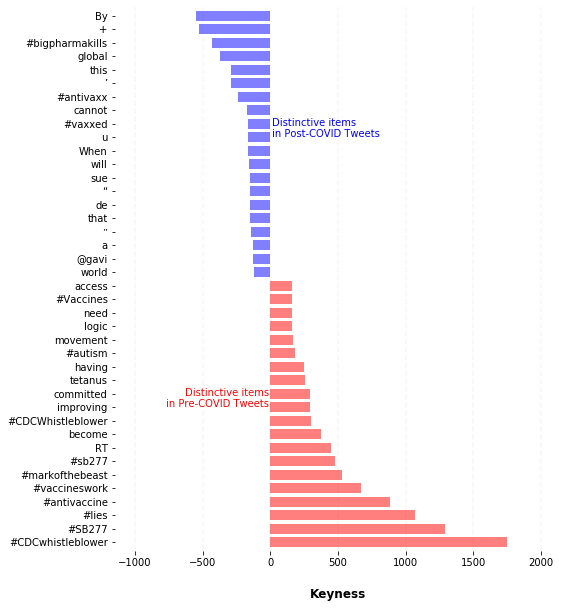

In [67]:
plot_keyitems(keyness_df, 20,
              corpusA='Pre-COVID Tweets', 
              corpusB='Post-COVID Tweets')

### Concordance Analysis

In [50]:
# KWIC Analysis for Pre-COVID Tweets
print_kwic(make_kwic('vaccines', pre_toks, win=5))

          https://t.co/l2KAoiwfIP one of the worst  vaccines  #ShowUpDay #CDCwhistleblower . @Dr_Mel_Thomson @reasonable_hank
chickenpox https://t.co/RcR6kR3lUq More deaths from  vaccines  . SMH Spread awareness #antivaccine
          @DrAlaAlwan supports expanding access to  vaccines  #MCIA16 #vaccineswork https://t.co/9Aag88VSZq Mom cures
                   Nice summary on recombinant MVA  vaccines  by MVA-pioneer Gerd Sutter https://t.co/fMCV6izpGb
                        owned media Do not mandate  vaccines  #ShowUpDay #CDCwhistleblower . @google https://t.co/Zy7SpPgJtE
                Sensoring candidates ' speeches on  vaccines  ? https://t.co/WnWnIRFdHK #NoSB277 #CDCwhistleblower #India
                 infant immune capacity needed for  vaccines  . I'm an Anti-Braker -
                                  : " I BELIEVE in  vaccines  . " #VaccineFailure #VaccineInjury #VaccineChoice
              launched new e-commerce platform for  vaccines  , pharma products https://t.co/iyxHvn1

In [49]:
# KWIC Analysis for Post-COVID Tweets
print_kwic(make_kwic('vaccines', post_toks, win=5))

             no longer trust government affiliated  vaccines  . #antivaccine https://t.co/uYrogUeiEA Oxford vaccine
                             Can't say it enough :  vaccines  don't cause #autism . https://t.co/7nhaQdwK4E
                    and #BillGates push for global  vaccines  . Anybody else feeling #AntiVaccine
                          outlier . How to decline  vaccines  . #antivax #AntiVaccine https://t.co/ieWNaEScAz Can
                     s behind the #HPVmandates and  vaccines  without #parentalknowlege or #consent is
                  anti-vaxxers ready to believe in  vaccines  again ? via @edrybicki https://t.co/UViI3iqrja
                        all of those diseases that  vaccines  eliminated coming back to life
                            wanted a world with no  vaccines  . Here's the world without
                           . They dont make custom  vaccines  for those who are allergic
                           . Now he suddenly loves  vaccines  . But do us a
     

### Sentiment Analysis
*To begin the sentiment anlysis, we will first identify Twitter users who are represented in both corpora, and then use their valence/polarity scores over time to draw conclusions about change in the anti-vaccination conversation.*
#### Preparation

In [54]:
pre_users = list(set([t['username'] for t in pre_covid_tweets]))
post_users = list(set([t['username'] for t in post_covid_tweets]))
longitudinal_users = [u for u in pre_users if u in post_users]
len(longitudinal_users)

97

Now we can identify all of the tweets in our samples that were posted by these "longitudinal users," and observe their characteristics.

In [77]:
# Initialize tweet dataframes
pre_df = pd.DataFrame(pre_covid_tweets) 
post_df = pd.DataFrame(post_covid_tweets)

# Remove tweets that weren't posted by longitudinal users
pre_df = pre_df[pre_df['username'].apply(lambda u: u in longitudinal_users)]
post_df = post_df[post_df['username'].apply(lambda u: u in longitudinal_users)]

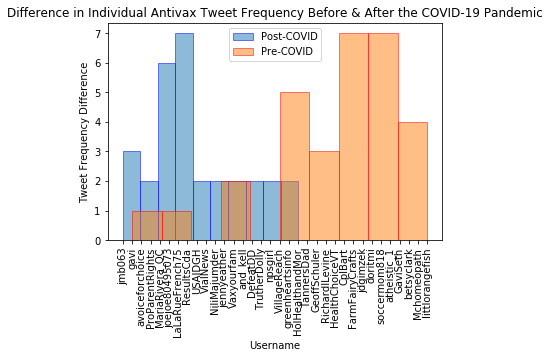

In [99]:
# Plot histogram of pre-covid tweet frequency among longitudinal users
plt.hist(post_df.sample(30)['username'], alpha=0.5, edgecolor='blue', density=False)
plt.hist(pre_df.sample(30)['username'], alpha=0.5, edgecolor='red', density=False)
plt.title('Difference in Individual Antivax Tweet Frequency Before & After the COVID-19 Pandemic')
plt.legend(['Post-COVID', 'Pre-COVID'])
plt.xticks(rotation = 90)
plt.xlabel('Username')
plt.ylabel('Tweet Frequency Difference')
plt.show()

In [87]:
pre_df.head().groupby('username')

,id,created_at,text,username
0,681433270597349376,2015-12-28 11:15,via @FoxNews: 2 Babies Dead &amp; 37 Sickened ...,FarmFairyCrafts
1,662451356301570054,2015-11-06 02:08,#SB277 how did @VaccinateCal work with rest of...,doritmi
18,629283392987754496,2015-08-06 13:30,#AntiVaccine Dr Jeff Bradstreet found dead. Wa...,TrutherDolly
30,681150368881979393,2015-12-27 16:31,+1 RT @naveenthacker: Help build the immunity ...,gavi
31,681452989131833344,2015-12-28 12:33,#CDCwhistleblower https://t.co/IarmnBmGII,nomedicmandates


In [89]:
pre_covid_tweets[31]['text']

'#CDCwhistleblower https://t.co/IarmnBmGII'

In [100]:
pre_user_freq = Counter(pre_df['username'])
post_user_freq = Counter(post_df['username'])

In [106]:
pre_user_freq.most_common(20)

[('TannersDad', 199),
 ('doritmi', 195),
 ('jdgimzek', 88),
 ('littlorangefish', 65),
 ('LaPizzi63', 38),
 ('LaLaRueFrench75', 38),
 ('gavi', 21),
 ('FarmFairyCrafts', 20),
 ('betsyclark', 18),
 ('jmb063', 18),
 ('Mchomeopath', 18),
 ('nomedicmandates', 17),
 ('susan_welch7', 14),
 ('GeoffSchuler', 13),
 ('RichardILevine', 12),
 ('Vaccines', 11),
 ('gramps97', 11),
 ('CplBart', 11),
 ('joejoe80495073', 10),
 ('atheistic_1', 9)]

In [102]:
post_user_freq.most_common(20)

[('joejoe80495073', 74),
 ('and_kell', 31),
 ('LaLaRueFrench75', 27),
 ('MariaRivera_OC', 10),
 ('ResultsCda', 10),
 ('susan_welch7', 9),
 ('Vaxyourfam', 9),
 ('gavi', 9),
 ('npsgirl', 6),
 ('gramps97', 6),
 ('doritmi', 6),
 ('AnGobanSaor', 5),
 ('TannersDad', 5),
 ('VialNews', 5),
 ('postpolionews', 5),
 ('libertytarian', 5),
 ('Annsk1', 4),
 ('avoiceforchoice', 4),
 ('jmb063', 4),
 ('TrutherDolly', 4)]

#### Scoring & Analysis

In [108]:
pre_top = [f[0] for f in pre_user_freq.most_common(20)]
post_top = [f[0] for f in post_user_freq.most_common(20)]
top_posters = [u for u in pre_top if u in post_top]
top_posters

['TannersDad',
 'doritmi',
 'LaLaRueFrench75',
 'gavi',
 'jmb063',
 'susan_welch7',
 'gramps97',
 'joejoe80495073']

In [112]:
# Object for sentiment scoring
sid = SentimentIntensityAnalyzer()

In [117]:
pre_df['polarity'] = pre_df['text'].map(lambda t: sid.polarity_scores(t)['compound'])
pre_df.head()

,id,created_at,text,username,polarity
0,681433270597349376,2015-12-28 11:15,via @FoxNews: 2 Babies Dead &amp; 37 Sickened ...,FarmFairyCrafts,-0.8316
1,662451356301570054,2015-11-06 02:08,#SB277 how did @VaccinateCal work with rest of...,doritmi,0.4404
18,629283392987754496,2015-08-06 13:30,#AntiVaccine Dr Jeff Bradstreet found dead. Wa...,TrutherDolly,-0.6486
30,681150368881979393,2015-12-27 16:31,+1 RT @naveenthacker: Help build the immunity ...,gavi,0.4019
31,681452989131833344,2015-12-28 12:33,#CDCwhistleblower https://t.co/IarmnBmGII,nomedicmandates,0.0000


In [118]:
post_df['polarity'] = post_df['text'].map(lambda t: sid.polarity_scores(t)['compound'])
post_df.head()

,id,created_at,text,username,polarity
23,1253043926241619974,2020-04-22 19:32,Are we surprised that two groups that advocate...,DrPChouinard,0.2263
160,1255887308756303872,2020-04-30 15:50,For a group that strenuously denies being #ant...,AnGobanSaor,-0.9278
190,1255513995773194243,2020-04-29 15:07,#Coronavirus as a Reminder of the Urgency of G...,picardonhealth,0.6486
311,1254770874680393729,2020-04-27 13:54,"@Believe_Mothers @realDonaldTrump #liar. 60,00...",jdgimzek,-0.7991
332,1254634809944612866,2020-04-27 04:53,The Robert Scott Bell Show @rsbellmedia on @uk...,ukhealthradio,0.6114
